## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

For this project, we will be using A/B tests to provide a solution to an e-commerce website if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

#### Part I - Probability

Let's import our libraries.

In [56]:
""" 
Importing libraries
""" 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

a. Now, reading in the csv file and looking at the first few columns in it

In [57]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. We find the number of rows in the dataset.

In [58]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [59]:
len(df['user_id'].unique())

290584

d. The proportion of users converted.

In [60]:
count=0

for i in df.converted:
    if(i==1):
        count+=1

print(count/df.shape[0])


0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [61]:
df.groupby(["group", "landing_page"]).size()

group      landing_page
control    new_page          1928
           old_page        145274
treatment  new_page        145311
           old_page          1965
dtype: int64

In [62]:
""" 
Adding up the number of times 'new_page' and 'treatment' that don't line up
""" 
1928 + 1965

3893

f. Identifying the rows have missing values?

In [63]:
""" 
Checking rows with missing values
""" 
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**It can be seen that none of the rows have any missing values.**

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  

a. We create a new dataframe 'df2' to store in the values removing the rows that do not align.

In [64]:
""" 
Removing rows that do not align.
""" 
df2 = df[( ((df['group'] == 'treatment') & (df['landing_page'] == 'new_page') ) | ( (df['group'] == 'control') & (df['landing_page'] == 'old_page')) ) == True]


In [65]:
""" 
We check once again if all the correct rows are removed
""" 
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` We use **df2** and the cells below to answer the questions below.

a. How many unique **user_id**s are in **df2**?

In [66]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [67]:
vc = df2.user_id.value_counts()
vc[vc > 1].index[0]

773192

c. What is the row information for the repeat **user_id**? 

In [68]:
""" 
The user_id is obtained from the previous cell to get the row entries corresponding to the repeated one.
""" 
df2.loc[df2['user_id'] == 773192]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [69]:
""" 
Dropping off one of the rows which has a double entry
""" 
df2 = df2.drop(df2.index[[1899]])

`4.` We use **df2** in the below cells to answer the quiz questions coming further.

a. What is the probability of an individual converting regardless of the page they receive?

In [70]:
""" 
'a' gives the entries of 1's in the 'converted' column
'b' gives the total number of unique user_ids
'p' is the probability of an individual converting regardless of it is a 'old_page' or 'new_page'
""" 
a = df2.loc[df2['converted'] == 1]
b = len(df2['user_id'].unique()) 
p = len(a)/b
print(p)

0.11959749882133504


b. Given that an individual was in the `control` group, what is the probability they converted?

In [71]:
""" 
Creating a subsidiary data frame with entries corresponding to 'control' group
""" 
control_df2 = df2.query('group == "control"')

In [72]:
""" 
Gives the probability of those who converted within the control group
""" 

control_p = control_df2.query('converted == 1').user_id.nunique()/control_df2.query('group== "control"').user_id.nunique()
control_p

0.12038713319061353

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [73]:
""" 
Creating a subsidiary data frame with entries corresponding to 'treatment' group
""" 
treatment_df2 = df2.query('group == "treatment"')

In [74]:
""" 
Gives the probability of those who converted within the 'treatment' group
""" 
treatment_p = treatment_df2.query('converted == 1').user_id.nunique()/treatment_df2.query('group== "treatment"').user_id.nunique()
treatment_p

0.11880806551510564

d. What is the probability that an individual received the new page?

In [75]:
""" 
'count_new_page' gives the number of people receiving the new page
'total' gives the total number of people visiting the website
Their ration gives the probability of those who received the new page.
""" 
count_new_page = df2.landing_page.value_counts()['new_page'] 
total = len(df2['user_id'].unique()) 
count_new_page/total

0.50006710647216113

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The above computed results are not sufficient enough to make a conclusion because we have considered only the probabilities based on control and treatment separately and the probability the individual received the new page but a relation between control/treatment leading to a conversion has not been studied. This is because there is no direct relation between receiving a new page and conversion where it is also possible to go the other way round. **

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**If the pold <= 0.05, then we can reject the null hypothesis and the alternative should considered, i.e., the new page should be implemented, whereas if p>0.05, thenwe fail to reject the null hypothesis, and the old page should be kept the same.**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>


a. What is the **convert rate** for $p_{new}$ under the null? 

In [76]:
""" 
Calculating p_new under the null
""" 
p_new = len(df2.query('converted==1'))/df2.shape[0]
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [77]:
""" 
p_old is given to be equal to p_new
""" 
p_old = p_new
p_old

0.11959708724499628

c. What is $n_{new}$?

In [78]:
""" 
Number of samples that have the new version of the page
""" 
n_new = df2.landing_page.value_counts()['new_page']
n_new

145311

d. What is $n_{old}$?

In [79]:
""" 
Number of samples that have the new version of the page
""" 
n_old = df2.landing_page.value_counts()['old_page']
n_old

145273

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [80]:
""" 
Simulate n_new transactions with a conversion rate of p_new
""" 
new_page_converted = np.random.binomial(1, p_new, n_new)
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [81]:
""" 
Simulate n_old transactions with a conversion rate of p_old
"""
old_page_converted = np.random.binomial(1, p_old, n_old)
old_page_converted

array([0, 0, 1, ..., 0, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [82]:
""" 
Difference of p_new and p_old
"""
p_new - p_old

0.0

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [83]:
""" 
Simulate 1000 values of (p_new - p_old) by using a random function
Here, only 1000 samples are taken due to the large computational time taken to evaluate 10,000 samples.
"""
p_diffs = [] 
for _ in range(1000): 
    new_bootsample = np.random.binomial(1, p_new, n_new) 
    old_bootsample = np.random.binomial(1, p_old, n_old) 
    p_diffs.append(float(new_bootsample.mean() - old_bootsample.mean()))

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

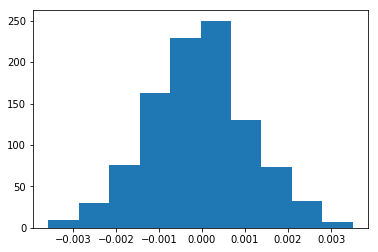

In [84]:
""" 
Plotting a histogram of the p_diffs. They look very similar to a normal plot.
"""
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [85]:
""" 
Converting the p_diffs into an array
Calculating the actual p-value
"""
p_diffs = np.array(p_diffs)
actual_p = p_new - p_old

In [86]:
""" 
Identifying the number of the values that are greater than the mean
"""
(p_diffs > actual_p).mean()

0.47799999999999998

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In scientific studies, this value is called the p-value. We see an uniform distribution on either side of the mean value. But due to the high p-value, we fail to reject the null hypothesis which implies the older page should be kept as it is without changing to the new one. **

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [87]:
""" 
Importing relevant libraries
Also calculating when the conversion has been positive based on whether the landing page is the old/new one.
"""
import statsmodels.api as sm

old_df2 = df2.query('landing_page == "old_page"')
convert_old = old_df2.query('converted == 1').user_id.nunique()
new_df2 = df2.query('landing_page == "new_page"')
convert_new = new_df2.query('converted == 1').user_id.nunique()
n_old = df2.landing_page.value_counts()['old_page']
n_new = df2.landing_page.value_counts()['new_page'];

/Users/srirampr/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [88]:
""" 
Computing the z-score and p-value
"""
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new])
print("Z-score:",z_score)
print("P-value:",p_value)


Z-score: 1.31229165669
P-value: 0.189421746172


In [89]:
""" 
Norm_CDF tells us how significant our z-score is
Norm_PPF tells us the citrical value of confidence is
"""
from scipy.stats import norm

print("Norm_CDF:",norm.cdf(z_score))
## Tells us how significant our z-score is

print("Norm_PPF:",norm.ppf(1-(0.488/2)) )
#  Tells us what our critical value at 48.9% confidence is

Norm_CDF: 0.905289126914
Norm_PPF: 0.693493346283


**Since the z-score is greater than 0.69, we fail to reject the null hypothesis.**

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Both the answers agree with each other on rejecting the null hypothesis.
The discrepancy in the values is most probably from the smaller simulation time in the analysis of the former.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**We intially use a linear regression model and then extend to a multilinear regression model.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [90]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [91]:
""" 
Creating dummy values for the categorical variables on 'control' and 'treatment'
"""
df2['intercept']=1
df2[['control','treatment']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [92]:
""" 
Renaming the 'treatment' column to 'ab_page'
"""
df2 = df2.rename(columns={'treatment': 'ab_page'})
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [93]:
""" 
Linear fit of 'ab_page' and 'converted'
"""
lm = sm.OLS(df2['converted'],df2[['intercept','ab_page']] )
results = lm.fit()

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [94]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.722
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.189
Time:                        23:01:10   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290582   BIC:                         1.706e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1204      0.001    141.407      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.312      0.189      -0.004       0.001
==============================================================================
Omnibus:                   125553.453   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414313.338
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.189. 
It gives a value much lesser than 0.5 as shown in part II.
This is because the quantities for which the p-value was found in part II was related to the conversion factor which solely depends on whether the conversion is '1' or '0'. On the other hand, here we look at the conversion factor that is related to a particular group, in this case being the 'treatment'.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It is indeed a good idea to consider other factors into our model but one needs to be wary of the interdependence of one variable on the other, which is otherwise known as bi-variate relationships.
This can affect outcome of p-value.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [95]:
""" 
Reading the countries csv file and joining it to the existing dataframe
"""
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [96]:
df_new.country.unique()

array(['US', 'UK', 'CA'], dtype=object)

In [97]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page
user_id,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1


In [98]:
### Create the necessary dummy variables
""" 
Creating the dummy variables for the list of countries
"""
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])

In [99]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,ab_page,CA,UK,US
user_id,,,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,0,1,0,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,0,1,0,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,1,0,0,0,1
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,0,1,0,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,0,1,0,0,1


In [100]:
""" 
Fixing 'CA' using a multi linear fit to the other countries to understand their dependence on conversion
"""
lm = sm.OLS(df_new['converted'],df_new[['intercept','US','UK']] )
results = lm.fit()

In [101]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.605
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.201
Time:                        23:01:10   Log-Likelihood:                -85267.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1153      0.003     42.792      0.000       0.110       0.121
US             0.0042      0.003      1.516      0.130      -0.001       0.010
UK             0.0053      0.003      1.787      0.074      -0.001       0.011
==============================================================================
Omnibus:                   125552.384   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414306.036
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         9.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**While 'CA' looks to have an effect on the conversion, US and UK do not as seen by the small p-values and also from the coefficients. The intercept gives the value when the values for US and UK are zero, and this is much larger than the coefficients for US and UK.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [102]:
### Fit Your Linear Model And Obtain the Results

In [103]:
""" 
Linear fit of 'ab_page' and all the countries
"""
lm = sm.OLS(df_new['converted'],df_new[['intercept','ab_page','US','UK','CA']] )
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.139
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.336
Time:                        23:01:10   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290579   BIC:                         1.706e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.824e+09   4.74e+09     -0.385      0.701   -1.11e+10    7.47e+09
ab_page       -0.0016      0.001     -1.309      0.190      -0.004       0.001
US          1.824e+09   4.74e+09      0.385      0.701   -7.47e+09    1.11e+10
UK          1.824e+09   4.74e+09      0.385      0.701   -7.47e+09    1.11e+10
CA          1.824e+09   4.74e+09      0.385      0.701   -7.47e+09    1.11e+10
==============================================================================
Omnibus:                   125551.007   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414296.667
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                     2.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [104]:
""" 
Linear fit of 'ab_page' and only 'CA' which is significant out of the three countries.
"""
lm = sm.OLS(df_new['converted'],df_new[['intercept','ab_page','CA']] )
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              converted   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.184
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.113
Time:                        23:01:10   Log-Likelihood:                -85266.
No. Observations:              290584   AIC:                         1.705e+05
Df Residuals:                  290581   BIC:                         1.706e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1206      0.001    139.870      0.000       0.119       0.122
ab_page       -0.0016      0.001     -1.310      0.190      -0.004       0.001
CA            -0.0045      0.003     -1.627      0.104      -0.010       0.001
==============================================================================
Omnibus:                   125551.559   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           414300.428
Skew:                           2.345   Prob(JB):                         0.00
Kurtosis:                       6.497   Cond. No.                         5.27
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**The negative coefficient for the 'ab_page' is most probably because of the multi-collinearity between the different countries/page. Considering only 'CA' the significant country based on the previous result, a multi-collinearity is clearly observed between the 'ab_page' and 'CA'. Also, the strong dependence between them can be seen based on the small p-values.**

<a id='conclusions'></a>
## Conclusions

In this project we have used several statistics principles to provide a possible solution to an e-commerce website who would like to know if the new page they implemented has had a better success rate than the older one.
<br>
1. At first, we looked at independent probabilities of making a change based on where it is in control/treatment. Since this was not sufficient we looked at conditional probabilties to gain better understanding.
<br>
2. From a statistical model we found a large p-value that fail to reject the null hypothesis. This was in agreement with z-score/p-value obtained using the statsmodel library, hence suggesting to stay with the old page and not move to the new one
<br>
3.Later using linear regression model, we found the p-value based on a correlation between'treatment' and conversion which again had a higher p-value but much lesser than obtained in the statistical part. 
<br>
4. Finally, the correlation between conversion and countries showed that 'CA' had a smaller value and correlates well with the conversion which is not the case with other countries, and hence one might not reject the null hypothesis here. We also find negative coefficients between 'ab_page' and 'CA' that denotes multi-collinearity.